<a href="https://colab.research.google.com/github/6202Binit/6202Binit/blob/master/EEG_signal_processing_using%20Gan_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install pyod
import os
import numpy as np
from pyod.models import hbos
from pyod.utils.data import evaluate_print
from sklearn.metrics import confusion_matrix,cohen_kappa_score,f1_score
from scipy import signal
import matplotlib.pyplot as plt
import pickle
import pandas as pd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-2.0.2-py3-none-any.whl size=198469 sha256=d446a8721c558622da09d1c53bbee4154266dd60530710bb9c555ef53e240218
  Stored in directory: /root/.cache/pip/wheels/77/c2/20/34d1f15b41b701ba69f42a32304825810d680754d509f91391
Successfully built pyod


In [2]:
import pandas as pd
import os

# Check if the file exists and its size
file_path = "/content/drive/MyDrive/dataset/features_raw.csv"

df = pd.read_csv(file_path)
df.head(5)

,Fp1,AF3,F3,F7,FC5,FC1,C3,T7,CP5,CP1,...,Cz,C4,T8,CP6,CP2,P4,P8,PO4,O2,Unnamed: 32
0,0.057813,-1.335266,4.640480,0.219573,7.473817,2.314842,1.918097,-9.257533,9.089943,-7.104519,...,-2.241480,1.415335,2.406646,12.864059,4.021099,-2.828598,-2.588735,2.637905,-5.226618,NaN
1,1.367408,10.259654,3.345409,7.897852,-2.446051,-1.655035,-6.301423,-7.290317,-3.546453,-5.705187,...,-2.568397,-5.651418,-0.096730,-4.930759,-1.722504,-6.111309,0.094893,-3.521353,1.887093,NaN
2,-1.783132,4.133553,-0.951680,-1.624803,-1.827309,-2.280364,-2.279225,9.151344,-0.239575,-0.057604,...,-2.132823,-0.521117,8.605298,-4.499946,-3.232839,-4.249645,-3.687167,-7.383004,-4.489537,NaN
3,-3.690217,-0.814000,2.295469,0.901445,8.323679,1.127906,6.356886,11.642082,9.354154,-1.662478,...,-0.506117,-1.154866,-3.940251,7.390881,2.129897,-0.794675,-1.959021,2.774530,-6.323060,NaN
4,2.137114,6.420466,6.122230,10.015321,3.106394,3.183129,3.658535,4.571793,4.917712,-2.325940,...,1.813907,-6.444635,-27.680880,0.641364,1.996658,-0.445779,2.614021,6.161845,3.308816,NaN


In [3]:
print(df.columns)

Index(['Fp1', 'AF3', 'F3', 'F7', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'P3',
       'P7', 'PO3', 'O1', 'Oz', 'Pz', 'Fp2', 'AF4', 'Fz', 'F4', 'F8', 'FC6',
       'FC2', 'Cz', 'C4', 'T8', 'CP6', 'CP2', 'P4', 'P8', 'PO4', 'O2',
       'Unnamed: 32'],
      dtype='object')


In [4]:
import pandas as pd
import os

# Check if the file exists and its size
file_path = "/content/drive/MyDrive/dataset/emotions.csv"

data = pd.read_csv(file_path)
data.head(5)

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [5]:
len(data)

2132

In [6]:
pos = data.loc[data["label"]=="POSITIVE"]
sample_pos = pos.loc[2, 'fft_0_b':'fft_749_b']
neg = data.loc[data["label"]=="NEGATIVE"]
sample_neg = neg.loc[0, 'fft_0_b':'fft_749_b']
neu = data.loc[data["label"]=="NEUTRAL"]
sample_neu = neu.loc[1, 'fft_0_b':'fft_749_b']

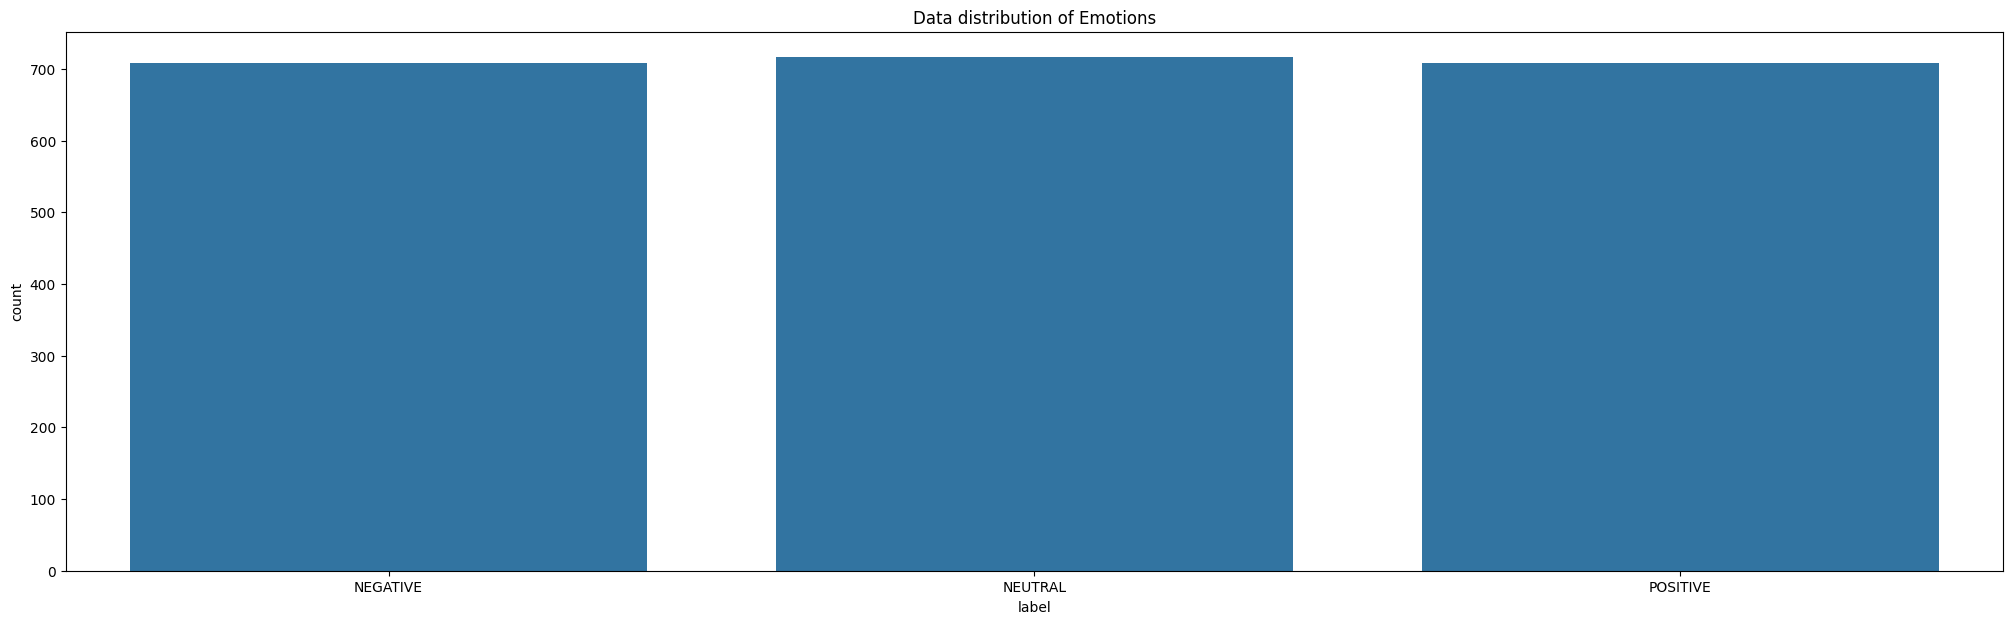

In [7]:
import seaborn as sns
#plottintg Dataframe distribution
plt.figure(figsize=(25,7))
plt.title("Data distribution of Emotions")
plt.style.use('fivethirtyeight')
sns.countplot(x='label', data=data)
plt.show()

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Load the data
file_path = "/content/drive/MyDrive/dataset/emotions.csv"
data = pd.read_csv(file_path)

# Check the columns in the DataFrame and strip whitespace
data.columns = data.columns.str.strip()

# Verify unique values in the label column
print("Unique labels:", data['label'].unique())

def Transform_data(data):
    # Encoding labels into numbers
    encoding_data = {'NEUTRAL': 0, 'POSITIVE': 1, 'NEGATIVE': 2}
    data_encoded = data.replace(encoding_data)

    # Getting brain signals into x variable (dropping label column)
    x = data_encoded.drop(["label"], axis=1)

    # Getting labels into y variable
    y = data_encoded.loc[:, 'label'].values

    # Scaling brain signals
    scaler = StandardScaler()
    scaler.fit(x)
    X = scaler.transform(x)

    # One hot encoding labels
    Y = to_categorical(y)
    return X, Y

# Call the function to transform the data
X, Y = Transform_data(data)

# Splitting the dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

# Checking shape of the dataset
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)


Unique labels: ['NEGATIVE' 'NEUTRAL' 'POSITIVE']


<ipython-input-8-be47472855a4>:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_encoded = data.replace(encoding_data)


Training data shape: (1705, 2548)
Testing data shape: (427, 2548)


In [9]:
print(data.columns)

Index(['# mean_0_a', 'mean_1_a', 'mean_2_a', 'mean_3_a', 'mean_4_a',
       'mean_d_0_a', 'mean_d_1_a', 'mean_d_2_a', 'mean_d_3_a', 'mean_d_4_a',
       ...
       'fft_741_b', 'fft_742_b', 'fft_743_b', 'fft_744_b', 'fft_745_b',
       'fft_746_b', 'fft_747_b', 'fft_748_b', 'fft_749_b', 'label'],
      dtype='object', length=2549)


In [10]:
x_train

array([[ 1.04986895,  0.45207307,  0.65354131, ...,  0.86661744,
         0.86661744, -0.5597164 ],
       [ 0.08789231,  0.10661145, -0.28621543, ..., -1.28627672,
        -1.28627672,  1.48608959],
       [-1.00478882,  0.10661145, -3.6320986 , ..., -1.03266353,
        -1.03266353,  2.0324911 ],
       ...,
       [-0.47816878,  0.35491199,  0.61232391, ...,  0.27297472,
         0.27297472, -0.41450159],
       [ 0.80119471,  0.46286875,  0.6666339 , ...,  0.31242566,
         0.31242566, -0.54741006],
       [ 0.80773877,  0.43048172,  0.65839042, ...,  0.533257  ,
         0.533257  , -0.53756499]])

In [11]:
y_train

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [12]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, Dropout
from tensorflow.keras.optimizers import Adam

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/dataset/emotions.csv")

# Separate features and labels
features = data.drop(columns=['label'])
labels = data['label']

# Normalize the features
features = (features - features.min()) / (features.max() - features.min())

# Convert features to numpy arrays
X_train = features.values

# Hyperparameters
latent_dim = 100
adam_lr = 0.0002
adam_beta_1 = 0.5



# Discriminator Model
def build_discriminator(input_dim):
    model = Sequential([
        Dense(1024, input_dim=input_dim),
        LeakyReLU(alpha=0.2),
        Dropout(0.3),
        Dense(512),
        LeakyReLU(alpha=0.2),
        Dropout(0.3),
        Dense(256),
        LeakyReLU(alpha=0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=adam_lr, beta_1=adam_beta_1), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Generator Model
def build_generator(latent_dim, output_dim):
    model = Sequential([
        Dense(256, input_dim=latent_dim),
        LeakyReLU(alpha=0.2),
        Dense(512),
        LeakyReLU(alpha=0.2),
        Dense(1024),
        LeakyReLU(alpha=0.2),
        Dense(output_dim, activation='tanh')
    ])
    return model

# GAN Model (combining generator and discriminator)
def build_gan(generator, discriminator):
    model = Sequential([generator, discriminator])
    discriminator.trainable = False
    model.compile(optimizer=Adam(learning_rate=adam_lr, beta_1=adam_beta_1), loss='binary_crossentropy')
    return model


# Create models
discriminator = build_discriminator(input_dim=X_train.shape[1])
generator = build_generator(latent_dim, output_dim=X_train.shape[1])
gan = build_gan(generator, discriminator)

# Training the GAN
def train_gan(epochs, batch_size):
    for epoch in range(epochs):
        # Generate random noise for the generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))

        # Generate fake data using the generator
        generated_data = generator.predict(noise)

        # Get a random set of real data
        real_data_idx = np.random.randint(0, X_train.shape[0], batch_size)
        real_data = X_train[real_data_idx]

        # Labels for real and fake data
        real_labels = np.ones((batch_size, 1))  # Real data label = 1
        fake_labels = np.zeros((batch_size, 1))  # Fake data label = 0

        # Train the discriminator on real and fake data
        d_loss_real = discriminator.train_on_batch(real_data, real_labels)
        d_loss_fake = discriminator.train_on_batch(generated_data, fake_labels)

        # Generate noise and misleading labels (all ones) for generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        misleading_labels = np.ones((batch_size, 1))  # Generator is trying to fool the discriminator

        # Train the generator via the GAN (where the discriminator is not trainable)
        g_loss = gan.train_on_batch(noise, misleading_labels)

        # Print generated data and fake labels every 100 epochs
        if epoch % 100 == 0:
            print(f'Epoch {epoch}')
            print(f'Discriminator Loss: {d_loss_real + d_loss_fake}, Generator Loss: {g_loss}')

            # Print the first generated data sample and its corresponding fake label
            print(f'Generated Data (first sample):\n{generated_data[0]}')
            print(f'Generated Label (fake): 0 (Fake Label)\n')

# Train the GAN
train_gan(epochs=100, batch_size=64)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Epoch 0
Discriminator Loss: [array(0.93235946, dtype=float32), array(0.140625, dtype=float32), array(0.7918055, dtype=float32), array(0.453125, dtype=float32)], Generator Loss: [array(0.7918055, dtype=float32), array(0.7918055, dtype=float32), array(0.453125, dtype=float32)]
Generated Data (first sample):
[-0.00064776 -0.17122324  0.00365789 ...  0.05052548 -0.12596549
 -0.1604795 ]
Generated Label (fake): 0 (Fake Label)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━

In [ ]:
import numpy as np

# Number of synthetic samples to generate
n_samples = 1000  # Adjust this number as desired

# Generate random noise
noise = np.random.normal(0, 1, (n_samples, latent_dim))

# Generate synthetic data from the trained generator
synthetic_data = generator.predict(noise)

# Check the shape of the generated data
print("Synthetic data shape:", synthetic_data.shape)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Synthetic data shape: (1000, 2548)


In [ ]:
print(synthetic_data)

[[-0.32678905 -0.30634454 -0.43799615 ...  0.15703137 -0.12086277
  -0.11387729]
 [-0.398484   -0.48779717 -0.35943198 ...  0.08546949 -0.26493442
  -0.04210393]
 [-0.15188555 -0.43282136 -0.38714632 ...  0.11296759 -0.23760307
  -0.18860593]
 ...
 [-0.4145902  -0.17809422 -0.47686505 ...  0.17905135 -0.27536732
  -0.10961974]
 [-0.36930305 -0.3036057  -0.32025588 ... -0.02133252 -0.34754074
  -0.13533047]
 [-0.31378868 -0.6277788  -0.40020114 ...  0.01505254 -0.30742532
  -0.02032226]]


In [ ]:
# Assign a placeholder label for synthetic data if desired, e.g., neutral class
synthetic_labels = np.zeros((synthetic_data.shape[0],))  # Using 0 for NEUTRAL


In [ ]:
# Concatenate real and synthetic features
X_combined = np.vstack((x_train, synthetic_data))

# One-hot encode synthetic labels to match the format of `Y`
Y_synthetic = to_categorical(synthetic_labels, num_classes=3)
Y_combined = np.vstack((y_train, Y_synthetic))


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the classifier model
model = Sequential([
    Dense(128, input_dim=X_combined.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # Assuming 3 classes: NEUTRAL, POSITIVE, NEGATIVE
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the classifier
model.fit(X_combined, Y_combined, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8439 - loss: 0.4012 - val_accuracy: 1.0000 - val_loss: 6.9873e-04
Epoch 2/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9724 - loss: 0.0925 - val_accuracy: 1.0000 - val_loss: 4.6321e-04
Epoch 3/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9811 - loss: 0.0616 - val_accuracy: 1.0000 - val_loss: 2.5934e-04
Epoch 4/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9898 - loss: 0.0333 - val_accuracy: 1.0000 - val_loss: 2.1120e-04
Epoch 5/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9934 - loss: 0.0314 - val_accuracy: 1.0000 - val_loss: 1.2009e-04
Epoch 6/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 0.0043 - val_accuracy: 1.0000 - val_loss: 7.5851e-05
Epoch 7/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 1.0000 - val_loss: 5.3845e-05
Epoch 8/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 6.9318e-04 - val_accurac

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", accuracy)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9743 - loss: 0.0905 
Test Accuracy: 0.9718969464302063


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict on the test set
y_pred = model.predict(x_test)

y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Print classification report
print(classification_report(y_test_classes, y_pred_classes, target_names=['NEUTRAL', 'POSITIVE', 'NEGATIVE']))

# Display confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
print("Confusion Matrix:\n", cm)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
              precision    recall  f1-score   support

     NEUTRAL       0.98      0.98      0.98       153
    POSITIVE       0.98      0.94      0.96       142
    NEGATIVE       0.96      1.00      0.98       132

    accuracy                           0.97       427
   macro avg       0.97      0.97      0.97       427
weighted avg       0.97      0.97      0.97       427

Confusion Matrix:
 [[150   3   0]
 [  3 133   6]
 [  0   0 132]]


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Assuming X and Y are already prepared (from the preprocessing steps)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
# Initialize the SVM model with RBF kernel
svm_model = SVC(kernel='rbf', C=1, gamma='scale', probability=True)

# Train the SVM model
svm_model.fit(x_train, y_train.argmax(axis=1))  # Use argmax to convert one-hot labels to single labels


SVC(C=1, probability=True)

In [ ]:
# Make predictions on the test set
y_pred = svm_model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test.argmax(axis=1), y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test.argmax(axis=1), y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test.argmax(axis=1), y_pred))


Test Accuracy: 95.78%
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       148
           1       0.94      0.93      0.93       136
           2       0.95      0.98      0.96       143

    accuracy                           0.96       427
   macro avg       0.96      0.96      0.96       427
weighted avg       0.96      0.96      0.96       427

Confusion Matrix:
 [[143   5   0]
 [  2 126   8]
 [  0   3 140]]
